In [3]:
import torch
import os
import glob
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
folders = glob.glob('Log_Output/*')
models_train_loss_mean = {}
models_train_loss_std = {}

for folder in folders:
    models_train_loss_mean[folder.split('/')[1]] = []
    models_train_loss_std[folder.split('/')[1]] = []
    files = glob.glob('%s/*'%(folder))
    for f in files:
        state_dict = torch.load(f)
        assert len(state_dict.keys()) == 1
        if 'train_loss' in list(state_dict.keys()):
            state_dict = state_dict['train_loss']
        elif 'losses_train' in list(state_dict.keys()):
            state_dict = state_dict['losses_train']
        else:
            raise ValueError('No known key found - ', list(state_dict.keys()))
        models_train_loss_mean[folder.split('/')[1]].append((int(f.split('/')[2].split('_')[1]), float(np.mean(state_dict))))
        models_train_loss_std[folder.split('/')[1]].append((int(f.split('/')[2].split('_')[1]), float(np.std(state_dict))))
        del state_dict

In [5]:
# Sorting mean and std dev for each model
for key, value in models_train_loss_mean.items():
    sorted_losses = sorted(value, key=lambda x:x[0], reverse=False)
    models_train_loss_mean[key] = sorted_losses
    
for key, value in models_train_loss_std.items():
    sorted_losses = sorted(value, key=lambda x:x[0], reverse=False)
    models_train_loss_std[key] = sorted_losses

In [6]:
# Weighted average of epoch loss mean and std.
models_train_loss = {}
assert list(models_train_loss_mean.keys()) == list(models_train_loss_std.keys())
for key in models_train_loss_mean.keys():
    models_train_loss[key] = []
    arr1 = models_train_loss_mean[key]
    arr2 = models_train_loss_std[key]
    assert len(arr1) == len(arr2)
    assert list([i[0] for i in arr1]) == list([i[0] for i in arr2])
    for i in arr1:
        models_train_loss[key].append((i[0], 0.75*i[1] + 0.25*arr2[i[0]-1][1]))

In [7]:
for i in models_train_loss_mean.items():
    print(i[0], len(i[1]))

COCO_lr_0_0001_Embed512_Adam 200
Attn_alpha_1_0_COCO_lr_0_0001_Embed512_Adam 200
COCO_lr_0_0001_Embed512_Res50_Adam 100
COCO_lr_0_01_Embed512_SGD 100
AttnLSTM_alpha_1_0_COCO_lr_0_0001_Embed512_Adam 115
COCO_lr_0_001_Embed256_SGD 100
COCO_lr_0_01_Embed256_SGD 100
COCO_lr_0_01_Embed512_Adam 155
COCO_lr_0_001_Embed512_SGD 100
COCO_lr_0_001_Embed512_Adam 200
COCO_lr_0_0001_Embed512_LSTM_Adam 100
COCO_lr_0_0001_Embed512_SGD 100


In [12]:
list(models_train_loss.keys())

['COCO_lr_0_0001_Embed512_Adam',
 'Attn_alpha_1_0_COCO_lr_0_0001_Embed512_Adam',
 'COCO_lr_0_0001_Embed512_Res50_Adam',
 'COCO_lr_0_01_Embed512_SGD',
 'AttnLSTM_alpha_1_0_COCO_lr_0_0001_Embed512_Adam',
 'COCO_lr_0_001_Embed256_SGD',
 'COCO_lr_0_01_Embed256_SGD',
 'COCO_lr_0_01_Embed512_Adam',
 'COCO_lr_0_001_Embed512_SGD',
 'COCO_lr_0_001_Embed512_Adam',
 'COCO_lr_0_0001_Embed512_LSTM_Adam',
 'COCO_lr_0_0001_Embed512_SGD']

In [18]:
models_train_loss_mean['Attn_alpha_1_0_COCO_lr_0_0001_Embed512_Adam']

[(1, 1.3245985174637822),
 (2, 0.5973922552571268),
 (3, 0.5530534717451889),
 (4, 0.5420283780207765),
 (5, 0.5379506763839139),
 (6, 0.5361399171954098),
 (7, 0.5352678656435281),
 (8, 0.534788574504388),
 (9, 0.5344878766573744),
 (10, 0.5343227070902997),
 (11, 0.5341726791410982),
 (12, 0.5340719586886686),
 (13, 0.5340319211442839),
 (14, 0.5339618442222717),
 (15, 0.5339189882961402),
 (16, 0.5338959007725245),
 (17, 0.5338456189394752),
 (18, 0.5338237044703655),
 (19, 0.533838397148873),
 (20, 0.5337945561547726),
 (21, 0.5337849941299536),
 (22, 0.5337627136986423),
 (23, 0.5337414176329036),
 (24, 0.5337617666521818),
 (25, 0.5337325432677144),
 (26, 0.5337324168571373),
 (27, 0.5337185060629731),
 (28, 0.5336996280983956),
 (29, 0.533724238253314),
 (30, 0.533725813518268),
 (31, 0.5337192645218298),
 (32, 0.5337035682965777),
 (33, 0.5336748434521575),
 (34, 0.5336922473175505),
 (35, 0.5337070350590413),
 (36, 0.533697924207438),
 (37, 0.5336710708502981),
 (38, 0.5336915

0.5336440625722069 191


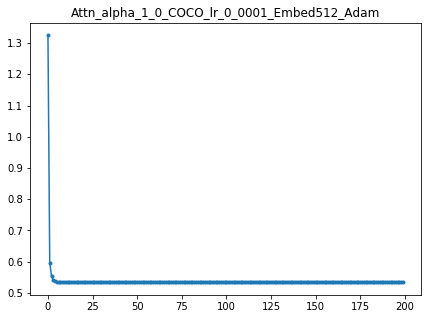

0.5336943144348193 95


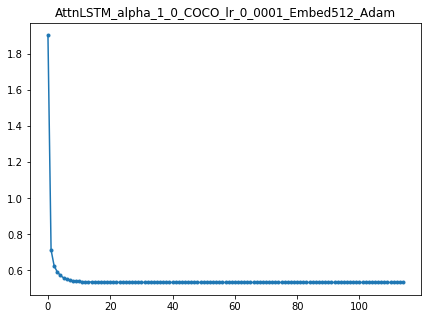

In [19]:
for key, value in models_train_loss_mean.items():
    if 'SGD' in key or 'Attn' not in key:
        continue
    sorted_losses = sorted(value, key=lambda x:x[0], reverse=False)
    value = [i[1] for i in value]
    if len(value) > 0:
        print(min(value), value.index(min(value))+1)
        plt.figure(figsize=(7, 5))
        plt.plot(value, marker='.')
        plt.title(key)
        plt.show()
    else:
        print("No data for %s."%(key))